# Assignment #4: NumPy Array Operations and Image Processing

This notebook contains implementations of various NumPy operations and image processing tasks.

## Task 1: Basic Operations with 1D and 2D NumPy Arrays

In [18]:
import numpy as np

# Global variables for arrays
arr_1d = None
arr_2d = None

def array_operations():
    global arr_1d, arr_2d
    
    # Create arrays
    arr_1d = np.array([1, 2, 3, 4, 5])
    arr_2d = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
    
    # Print arrays
    print("1D Array:", arr_1d)
    print("\n2D Array:\n", arr_2d)
    
    # Basic operations
    print("\nSum of 1D Array:", np.sum(arr_1d))
    print("Mean of 2D Array:", np.mean(arr_2d))
    print("\nTranspose of 2D Array:\n", arr_2d.T)

# Run the function
array_operations()

1D Array: [1 2 3 4 5]

2D Array:
 [[1 2 3]
 [4 5 6]
 [7 8 9]]

Sum of 1D Array: 15
Mean of 2D Array: 5.0

Transpose of 2D Array:
 [[1 4 7]
 [2 5 8]
 [3 6 9]]


## Task 2: Image Processing with NumPy (Indexing & Slicing)

In [19]:
def image_processing():
    # Create a random grayscale image
    image = np.random.randint(0, 256, (5, 5), dtype=np.uint8)
    
    print("Original Image:\n", image)
    
    # Slice the image
    cropped = image[1:4, 1:4]
    print("\nCropped Section:\n", cropped)
    
    # Invert colors
    inverted_image = 255 - image
    print("\nInverted Image:\n", inverted_image)
    
    return image, cropped, inverted_image

# Run the function
original, cropped, inverted = image_processing()

Original Image:
 [[179 100  59 171 133]
 [ 99 117 123 143 127]
 [163  97  54 177 251]
 [ 31 171 234 252  91]
 [211  83 159  52  31]]

Cropped Section:
 [[117 123 143]
 [ 97  54 177]
 [171 234 252]]

Inverted Image:
 [[ 76 155 196  84 122]
 [156 138 132 112 128]
 [ 92 158 201  78   4]
 [224  84  21   3 164]
 [ 44 172  96 203 224]]


## Task 3: Augmented Reality Transformation

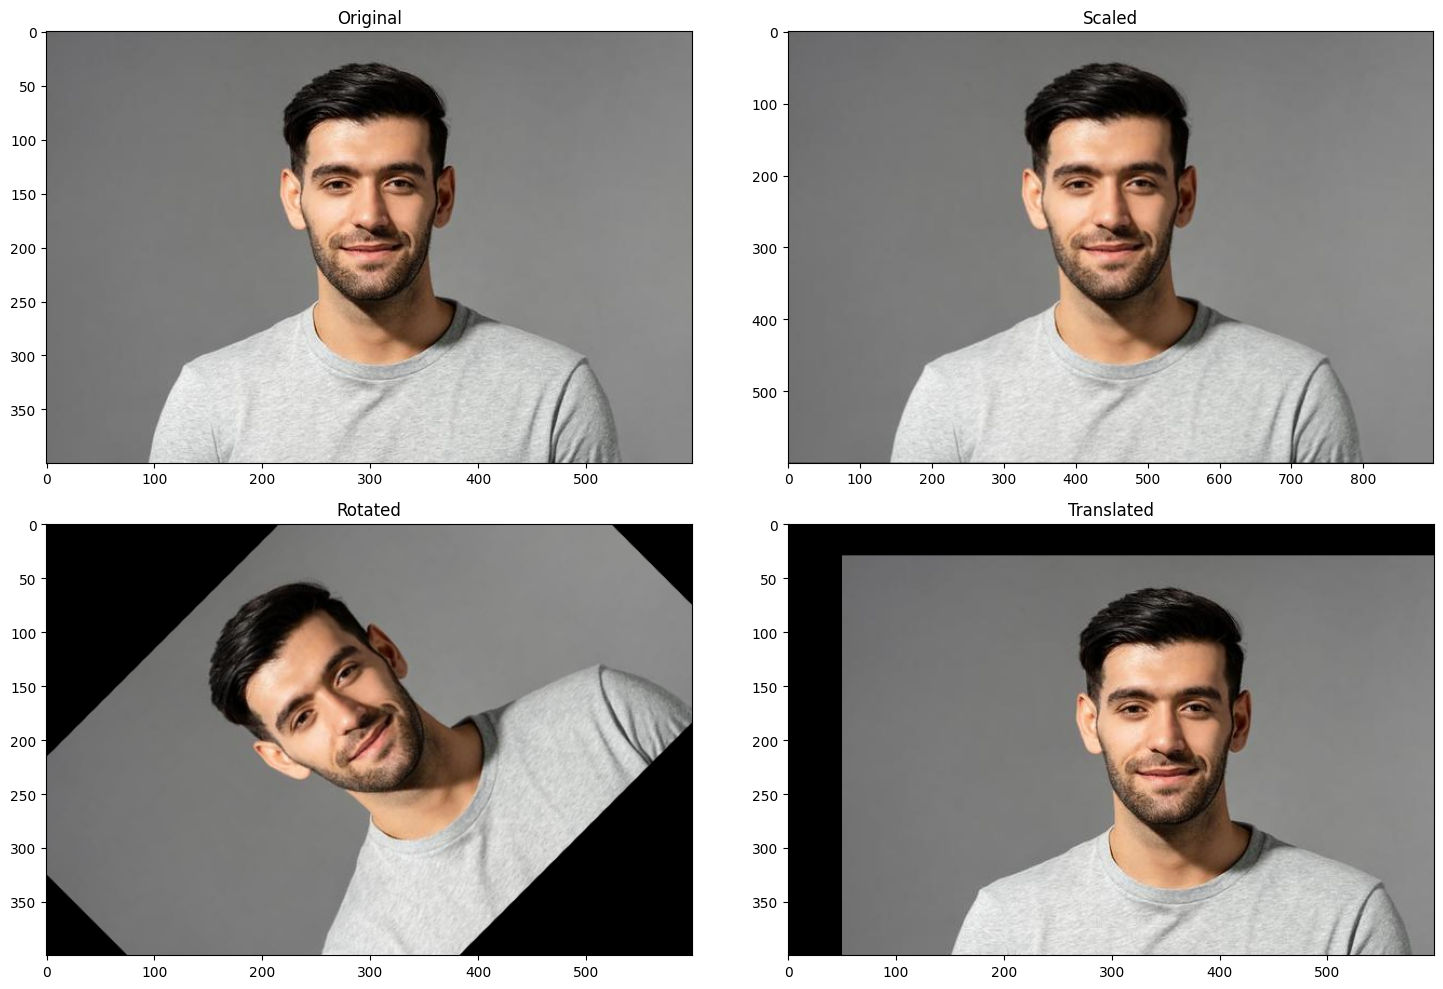

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def scale_image(image, scale_factor):
    rows, cols = image.shape[:2]
    scaling_matrix = np.array([[scale_factor, 0, 0], [0, scale_factor, 0]], dtype=np.float32)
    scaled_image = cv2.warpAffine(image, scaling_matrix, (int(cols * scale_factor), int(rows * scale_factor)))
    return scaled_image

def rotate_image(image, angle):
    rows, cols = image.shape[:2]
    rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), angle, 1)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (cols, rows))
    return rotated_image

def translate_image(image, tx, ty):
    translation_matrix = np.array([[1, 0, tx], [0, 1, ty]], dtype=np.float32)
    rows, cols = image.shape[:2]
    translated_image = cv2.warpAffine(image, translation_matrix, (cols, rows))
    return translated_image

image = cv2.imread(r'D:\Internship\IT skills Class\Class-2\Class-4\pic.jpg')

if image is not None:
    scaled_image = scale_image(image, 1.5)
    rotated_image = rotate_image(image, 45)
    translated_image = translate_image(image, 50, 30)
    
    plt.figure(figsize=(15, 10))
    
    plt.subplot(2, 2, 1)
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title('Original')
    
    plt.subplot(2, 2, 2)
    plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
    plt.title('Scaled')
    
    plt.subplot(2, 2, 3)
    plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
    plt.title('Rotated')
    
    plt.subplot(2, 2, 4)
    plt.imshow(cv2.cvtColor(translated_image, cv2.COLOR_BGR2RGB))
    plt.title('Translated')
    
    plt.tight_layout()
    plt.show()
else:
    print("Error: Could not load image. Please check the file path.")


## Task 4: Face Detection from Image Arrays

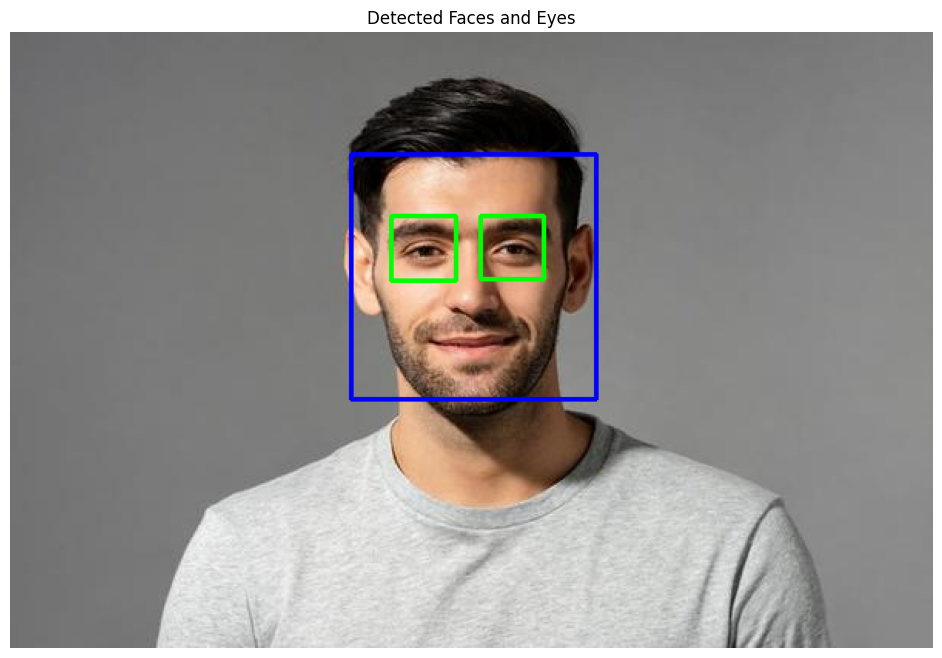

In [ ]:
import matplotlib.pyplot as plt  


def detect_faces(image_path):
    image = cv2.imread(image_path)
    if image is None:
        print("Error: Could not load image")
        return
    
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Load face cascade classifier
    face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    eyes_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')
    
    # Detect faces
    faces = face_cascade.detectMultiScale(image_gray, scaleFactor=1.1, minNeighbors=5)
    
    # Create a copy for drawing
    image_with_faces = image.copy()
    
    # Process each face
    for (x, y, w, h) in faces:
        # Draw rectangle around face
        cv2.rectangle(image_with_faces, (x, y), (x+w, y+h), (255, 0, 0), 2)
        
        # Extract face region
        face_region = image[y:y+h, x:x+w]
        face_region_gray = image_gray[y:y+h, x:x+w]
        
        # Detect eyes
        eyes = eyes_cascade.detectMultiScale(face_region_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(image_with_faces, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 2)
    
    # Display results using matplotlib
    plt.figure(figsize=(12, 8))
    plt.imshow(cv2.cvtColor(image_with_faces, cv2.COLOR_BGR2RGB))
    plt.title('Detected Faces and Eyes')
    plt.axis('off')
    plt.show()

detect_faces(r'D:\Internship\IT skills Class\Class-2\Class-4\pic.jpg')
